# Description

This work provides theoretical and practical knowledge about gradient descent, optimizers and loss functions.

# Tasks

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Task 1. Implement the gradient calculation for the function.

In [2]:
x = torch.tensor([[1., 2., 3., 4.], [5., 6., 7., 8.], [9., 10., 11., 12.]], requires_grad=True)
func = 10 * (x ** 2).sum()
func.backward()
x.grad

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]])

In [3]:
print('Last function: ', func.grad_fn)
print('Penultimate function: ', func.grad_fn.next_functions[0][0])
print('Pre-penultimate function: ', func.grad_fn.next_functions[0][0].next_functions[0][0])
print('Final function: ', func.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

Last function:  <MulBackward0 object at 0x7f973e0376d8>
Penultimate function:  <SumBackward0 object at 0x7f973e037748>
Pre-penultimate function:  <PowBackward0 object at 0x7f973e0376d8>
Final function:  <AccumulateGrad object at 0x7f973e0376a0>


Task 2. Implement the gradient calculation for the function. The gradient descent step is 0.001. Update the tensor and reset the gradient.

In [4]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
func_2 = (torch.log(torch.log(w + 7))).prod()
func_2.backward()
w.grad

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])

In [5]:
w.data -= 0.001 * w.grad
w.data

tensor([[ 5.0000, 10.0000],
        [ 1.0000,  2.0000]])

In [6]:
w.grad.zero_()
w.grad

tensor([[0., 0.],
        [0., 0.]])

Task 3. Implement the gradient calculation for the function. The gradient descent step is 0.001. Calculate the tensor w, in step t = 500.

In [7]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

In [8]:
for t in range(500):
    func_3 = (w + 7).log().log().prod()
    func_3.backward()
    w.data -= alpha * w.grad
    w.grad.zero_()
w

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)

Task 4. Rewrite the previous example (task 3) using torch.optim.SGD. The gradient descent step is 0.001. Calculate the tensor w, in step t = 500.

In [9]:
def make_gradient_step(var, alpha, optimizer):
    func_res = (var + 7).log().log().prod()
    func_res.backward()
    optimizer.step()
    optimizer.zero_grad()

In [10]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer = torch.optim.SGD([w], lr=alpha)

In [11]:
for i in range(500):
    make_gradient_step(w, alpha, optimizer)
w

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)

Task 5. Create a model that predicts the yield of apples and oranges (target variables) by the average temperature, rainfall and humidity (input variables or features) in the region.

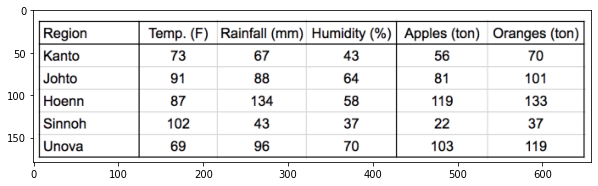

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('data/yield.png'))

In [13]:
def reg_model(x):
    return x @ w.t() + b

In [14]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff*diff) / diff.numel()

In [15]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [16]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [17]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [18]:
fn_history = []

for i in range(500):
    preds = reg_model(inputs)
    loss = mse(preds, targets)
    loss.backward()

    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        
    fn_history.append(loss)

In [19]:
preds = reg_model(inputs)
loss = mse(preds, targets)

print('Target: ', targets)
print('Prediction: ', preds)
print('Loss: ', loss)

Target:  tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
Prediction:  tensor([[ 57.1547,  71.7527],
        [ 89.7071,  95.5077],
        [101.6499, 142.3813],
        [ 22.4108,  44.0026],
        [114.0641, 106.2384]], grad_fn=<AddBackward0>)
Loss:  tensor(83.3898, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

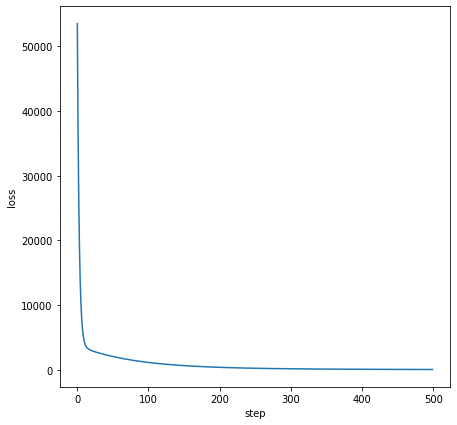

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(fn_history)
plt.xlabel('step')
plt.ylabel('loss')